In [0]:
from __future__ import print_function
import keras
import numpy as np
from keras import optimizers
from keras import models
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

In [0]:
#Load the data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

lfw_people.images.shape #Shape of the image and shape of the image

X = lfw_people.data 
y = lfw_people.target 

print(X.shape) #(1288,1850)
print(y.shape) #(1288,)

(1288, 1850)
(1288,)


In [0]:
#Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
#Data Preprocessing
print("Image Size:", lfw_people.images.shape)
print("Current Image size:", X_train.shape)
X_test.shape

from keras.utils import to_categorical

X_train = X_train.reshape((966, 50, 37))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((322, 50, 37))
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Image Size: (1288, 50, 37)
Current Image size: (966, 1850)


<function matplotlib.pyplot.show>

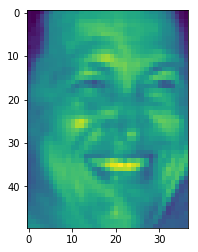

In [0]:
#Image Visualization
X_train[1].shape #(50, 37)

img = X_train[9]

import matplotlib.pyplot as plt
plt.imshow(img )
plt.show

In [0]:
from keras import models
from keras import layers

#Reshaping the Images
X_train = X_train.reshape((966, 50, 37, 1))
X_test = X_test.reshape((322, 50, 37, 1))

#Designing the model

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(50,37,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))

#Adding a classifier

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 35, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 5, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)            

In [0]:
#Training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

from keras import optimizers

history = model.fit(X_train, y_train, epochs=20, batch_size=16)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
966/966 [==============================] - 7s 7ms/step - loss: 1.7365 - acc: 0.3975
Epoch 2/20
966/966 [==============================] - 0s 504us/step - loss: 1.7042 - acc: 0.3975
Epoch 3/20
966/966 [==============================] - 1s 543us/step - loss: 1.6222 - acc: 0.3996
Epoch 4/20
966/966 [==============================] - 0s 515us/step - loss: 1.3813 - acc: 0.4959
Epoch 5/20
966/966 [==============================] - 0s 502us/step - loss: 1.0970 - acc: 0.6097
Epoch 6/20
966/966 [==============================] - 0s 492us/step - loss: 0.8617 - acc: 0.7340
Epoch 7/20
966/966 [==============================] - 0s 506us/step - loss: 0.7365 - acc: 0.7640
Epoch 8/20
966/966 [==============================] - 0s 502us/step - loss: 0.6098 - acc: 0.7899
Epoch 9/20
966/966 [==============================] - 0s 493us/step - loss: 0.5079 - acc: 0.8364
Epoch 10/20
966/966 [===========

In [0]:
#Testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test_acc:", test_acc)


322/322 [==============================] - 0s 326us/step
Test_acc: 0.8819875776397516


In [0]:
#Displaying curves of loss and accuracy
from keras.preprocessing.image import ImageDataGenerator
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, loss, label='Training Loss')
plt.show()